In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [53]:
full = pd.read_csv('full2.csv')
parks = pd.read_csv('df3_parks.csv')

In [54]:
full = full.drop('Unnamed: 0', axis=1)
full.head(3)

,trip_id,Date,starttime,bikeid,tripduration,from_station_name,station_id,usertype,start_hour,Mean_Temperature_F,Events,lat,long,install_date,current_dockcount,decommission_date
0,2875,18/10/2014,14:33:00,SEA00336,1910.479,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
1,2883,18/10/2014,14:38:00,SEA00023,2418.922,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN
2,2884,18/10/2014,14:38:00,SEA00107,2424.955,Pier 69 / Alaskan Way & Clay St,WF-01,Short-Term Pass Holder,14:00:00,64.0,Rain,47.614315,-122.354093,13-Oct-14,24.0,NaN


In [55]:
full['long'] = full['long'].round(4)

In [56]:
parks = parks.drop('Unnamed: 0', axis=1)
parks.head(3)

,zip code,x coord,y coord,locid,name_x,pmaid,feature_id,feature_desc
0,98119,-122.372985,47.636097,2545,12th and Howe Play Park,281,22,Play Area
1,98144,-122.317765,47.577953,2387,12th Ave S Viewpoint,4159,34,View
2,98107,-122.373536,47.660775,2546,14th Ave NW Boat Ramp,4010,7,Boat Launch (Hand Carry)


In [57]:
parks = parks.rename(columns={'x coord': 'long'})
parks.head(3)

,zip code,long,y coord,locid,name_x,pmaid,feature_id,feature_desc
0,98119,-122.372985,47.636097,2545,12th and Howe Play Park,281,22,Play Area
1,98144,-122.317765,47.577953,2387,12th Ave S Viewpoint,4159,34,View
2,98107,-122.373536,47.660775,2546,14th Ave NW Boat Ramp,4010,7,Boat Launch (Hand Carry)


In [58]:
parks['long'] = parks['long'].round(4)

# Merge bike and park df's

In [59]:
bike_parks = full.merge(parks, how='inner', on='long')

In [60]:
bike_parks.columns

Index(['trip_id', 'Date', 'starttime', 'bikeid', 'tripduration',
       'from_station_name', 'station_id', 'usertype', 'start_hour',
       'Mean_Temperature_F', 'Events', 'lat', 'long', 'install_date',
       'current_dockcount', 'decommission_date', 'zip code', 'y coord',
       'locid', 'name_x', 'pmaid', 'feature_id', 'feature_desc'],
      dtype='object')

In [61]:
bike_parks1 = bike_parks[['trip_id',
            'Date', 
            'from_station_name', 
            'zip code', 
            'name_x', 
            'feature_desc']]

# Looking at trips per 'feature_desc'

In [111]:
bike_parks2 = pd.DataFrame(bike_parks1.groupby(['Date', 'from_station_name', 'feature_desc', 'name_x']).size().reset_index().rename(columns={0: 'number_of_trips'}))

In [63]:
bike_parks2

,Date,from_station_name,feature_desc,name_x,number_of_trips
0,01/01/2015,2nd Ave & Blanchard St,BMX Dirt Jumps,Woodland Park,14
1,01/01/2015,2nd Ave & Blanchard St,Baseball/Softball,Woodland Park,14
2,01/01/2015,2nd Ave & Blanchard St,Decorative Fountain,Woodland Park,14
3,01/01/2015,2nd Ave & Blanchard St,Dog Off Leash Area,Woodland Park,14
4,01/01/2015,2nd Ave & Blanchard St,Horseshoe Pits,Woodland Park,14
...,...,...,...,...,...
58596,31/12/2015,Summit Ave E & E Republican St,Baseball/Softball,Rogers Playground,5
58597,31/12/2015,Summit Ave E & E Republican St,Play Area (ADA Compliant),Rogers Playground,5
58598,31/12/2015,Summit Ave E & E Republican St,Restrooms,Rogers Playground,5
58599,31/12/2015,Summit Ave E & E Republican St,Restrooms (ADA Compliant),Rogers Playground,5


In [64]:
# Encoding the data
bike_parks3 = pd.get_dummies(bike_parks2, columns=['feature_desc'])
bike_parks3.sample(5)

,Date,from_station_name,name_x,number_of_trips,feature_desc_Adult Fitness Equipment,feature_desc_BMX Dirt Jumps,feature_desc_Baseball/Softball,feature_desc_Basketball (Full),feature_desc_Basketball (Half),feature_desc_Boat Launch (Hand Carry),...,feature_desc_Tennis Backboard (Outdoor),feature_desc_Tennis Court (Outdoor),feature_desc_Tennis Lights,feature_desc_Track,feature_desc_View,feature_desc_Wading Pool or Water Feature,feature_desc_Waterfront,feature_desc_Weddings and Ceremonies,feature_desc_Woods,feature_desc_Zipline
49371,26/09/2015,12th Ave & NE Campus Pkwy,Victory Creek Park,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35815,19/10/2014,12th Ave & NE Campus Pkwy,Volunteer Park,24,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33684,18/08/2016,Pier 66 / Alaskan Way & Bell St,Riverview Playfield,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32988,18/05/2015,2nd Ave & Vine St,Bitter Lake Reservoir Open Space,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31375,17/07/2015,Summit Ave E & E Republican St,Rogers Playground,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
bike_parks3.columns

Index(['Date', 'from_station_name', 'name_x', 'number_of_trips',
       'feature_desc_Adult Fitness Equipment', 'feature_desc_BMX Dirt Jumps',
       'feature_desc_Baseball/Softball', 'feature_desc_Basketball (Full)',
       'feature_desc_Basketball (Half)',
       'feature_desc_Boat Launch (Hand Carry)',
       'feature_desc_Community Center', 'feature_desc_Creek',
       'feature_desc_Decorative Fountain', 'feature_desc_Dog Off Leash Area',
       'feature_desc_Fishing', 'feature_desc_Golf',
       'feature_desc_Guarded Beach', 'feature_desc_Historic Landmark',
       'feature_desc_Horseshoe Pits', 'feature_desc_Lawn Bowling',
       'feature_desc_P-Patch Community Garden', 'feature_desc_Paths',
       'feature_desc_Paths (ADA Compliant)', 'feature_desc_Pesticide Free',
       'feature_desc_Pickleball Court', 'feature_desc_Picnic Sites',
       'feature_desc_Play Area', 'feature_desc_Play Area (ADA Compliant)',
       'feature_desc_Pool (Indoor)', 'feature_desc_Rental Facility',
    

In [66]:
X = bike_parks3[['feature_desc_Adult Fitness Equipment', 
                    'feature_desc_BMX Dirt Jumps',
                    'feature_desc_Baseball/Softball', 
                    'feature_desc_Basketball (Full)',
                    'feature_desc_Basketball (Half)',
                    'feature_desc_Boat Launch (Hand Carry)',
                    'feature_desc_Community Center', 
                    'feature_desc_Creek',
                    'feature_desc_Decorative Fountain', 
                    'feature_desc_Dog Off Leash Area',
                    'feature_desc_Fishing', 
                    'feature_desc_Golf',
                    'feature_desc_Guarded Beach', 
                    'feature_desc_Historic Landmark',
                    'feature_desc_Horseshoe Pits', 
                    'feature_desc_Lawn Bowling',
                    'feature_desc_P-Patch Community Garden', 
                    'feature_desc_Paths',
                    'feature_desc_Paths (ADA Compliant)', 
                    'feature_desc_Pesticide Free',
                    'feature_desc_Pickleball Court', 
                    'feature_desc_Picnic Sites',
                    'feature_desc_Play Area', 
                    'feature_desc_Play Area (ADA Compliant)',
                    'feature_desc_Pool (Indoor)', 
                    'feature_desc_Rental Facility',
                    'feature_desc_Restrooms', 
                    'feature_desc_Restrooms (ADA Compliant)',
                    'feature_desc_Skatepark', 
                    'feature_desc_Soccer',
                    'feature_desc_Tennis Backboard (Outdoor)',
                    'feature_desc_Tennis Court (Outdoor)', 
                    'feature_desc_Tennis Lights',
                    'feature_desc_Track', 
                    'feature_desc_View',
                    'feature_desc_Wading Pool or Water Feature', 
                    'feature_desc_Waterfront',
                    'feature_desc_Weddings and Ceremonies', 
                    'feature_desc_Woods',
                    'feature_desc_Zipline']]

y = bike_parks3['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42)

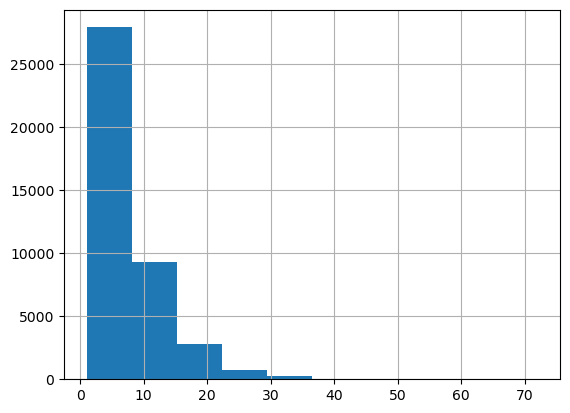

In [67]:
y_train.hist();

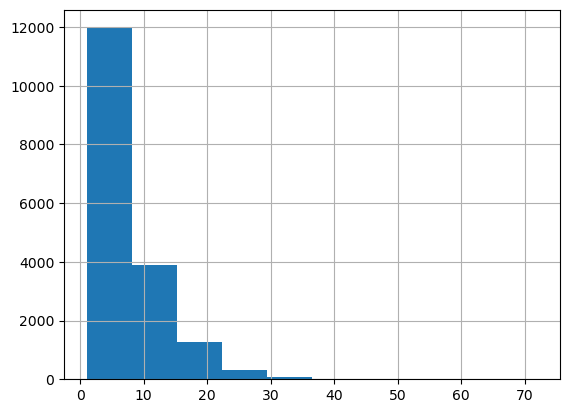

In [68]:
y_test.hist();

In [69]:
# create scalers
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [70]:
cols = list(X_train.columns)
cols

['feature_desc_Adult Fitness Equipment',
 'feature_desc_BMX Dirt Jumps',
 'feature_desc_Baseball/Softball',
 'feature_desc_Basketball (Full)',
 'feature_desc_Basketball (Half)',
 'feature_desc_Boat Launch (Hand Carry)',
 'feature_desc_Community Center',
 'feature_desc_Creek',
 'feature_desc_Decorative Fountain',
 'feature_desc_Dog Off Leash Area',
 'feature_desc_Fishing',
 'feature_desc_Golf',
 'feature_desc_Guarded Beach',
 'feature_desc_Historic Landmark',
 'feature_desc_Horseshoe Pits',
 'feature_desc_Lawn Bowling',
 'feature_desc_P-Patch Community Garden',
 'feature_desc_Paths',
 'feature_desc_Paths (ADA Compliant)',
 'feature_desc_Pesticide Free',
 'feature_desc_Pickleball Court',
 'feature_desc_Picnic Sites',
 'feature_desc_Play Area',
 'feature_desc_Play Area (ADA Compliant)',
 'feature_desc_Pool (Indoor)',
 'feature_desc_Rental Facility',
 'feature_desc_Restrooms',
 'feature_desc_Restrooms (ADA Compliant)',
 'feature_desc_Skatepark',
 'feature_desc_Soccer',
 'feature_desc_Tenni

In [71]:
X_train

,feature_desc_Adult Fitness Equipment,feature_desc_BMX Dirt Jumps,feature_desc_Baseball/Softball,feature_desc_Basketball (Full),feature_desc_Basketball (Half),feature_desc_Boat Launch (Hand Carry),feature_desc_Community Center,feature_desc_Creek,feature_desc_Decorative Fountain,feature_desc_Dog Off Leash Area,...,feature_desc_Tennis Backboard (Outdoor),feature_desc_Tennis Court (Outdoor),feature_desc_Tennis Lights,feature_desc_Track,feature_desc_View,feature_desc_Wading Pool or Water Feature,feature_desc_Waterfront,feature_desc_Weddings and Ceremonies,feature_desc_Woods,feature_desc_Zipline
15643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
55493,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
38158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15795,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [72]:
# scale the data
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [73]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [74]:
y_train

array([[ 0.42655387],
       [-0.91909006],
       [-0.58267908],
       ...,
       [ 0.09014289],
       [ 0.25834838],
       [-0.58267908]])

In [75]:
X_train.describe()

,feature_desc_Adult Fitness Equipment,feature_desc_BMX Dirt Jumps,feature_desc_Baseball/Softball,feature_desc_Basketball (Full),feature_desc_Basketball (Half),feature_desc_Boat Launch (Hand Carry),feature_desc_Community Center,feature_desc_Creek,feature_desc_Decorative Fountain,feature_desc_Dog Off Leash Area,...,feature_desc_Tennis Backboard (Outdoor),feature_desc_Tennis Court (Outdoor),feature_desc_Tennis Lights,feature_desc_Track,feature_desc_View,feature_desc_Wading Pool or Water Feature,feature_desc_Waterfront,feature_desc_Weddings and Ceremonies,feature_desc_Woods,feature_desc_Zipline
count,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,...,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04,4.102000e+04
mean,2.583123e-17,6.432906e-17,1.909194e-17,-4.988696e-17,3.022665e-17,-6.322479e-17,1.970362e-18,5.636101e-17,-6.172537e-17,-4.830634e-17,...,-5.629605e-18,3.550981e-17,-6.495698e-18,-4.618441e-17,3.353404e-18,2.130589e-17,2.537653e-17,-1.870761e-17,1.219026e-17,2.550644e-17
std,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,...,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00,1.000012e+00
min,-1.093845e-01,-1.075439e-01,-2.235868e-01,-1.211132e-01,-1.797589e-01,-1.460755e-01,-1.192344e-01,-1.036492e-01,-1.298334e-01,-1.051999e-01,...,-1.061434e-01,-1.962998e-01,-1.640488e-01,-1.064952e-01,-1.905347e-01,-1.601682e-01,-2.186133e-01,-1.009730e-01,-1.848977e-01,-1.031675e-01
25%,-1.093845e-01,-1.075439e-01,-2.235868e-01,-1.211132e-01,-1.797589e-01,-1.460755e-01,-1.192344e-01,-1.036492e-01,-1.298334e-01,-1.051999e-01,...,-1.061434e-01,-1.962998e-01,-1.640488e-01,-1.064952e-01,-1.905347e-01,-1.601682e-01,-2.186133e-01,-1.009730e-01,-1.848977e-01,-1.031675e-01
50%,-1.093845e-01,-1.075439e-01,-2.235868e-01,-1.211132e-01,-1.797589e-01,-1.460755e-01,-1.192344e-01,-1.036492e-01,-1.298334e-01,-1.051999e-01,...,-1.061434e-01,-1.962998e-01,-1.640488e-01,-1.064952e-01,-1.905347e-01,-1.601682e-01,-2.186133e-01,-1.009730e-01,-1.848977e-01,-1.031675e-01
75%,-1.093845e-01,-1.075439e-01,-2.235868e-01,-1.211132e-01,-1.797589e-01,-1.460755e-01,-1.192344e-01,-1.036492e-01,-1.298334e-01,-1.051999e-01,...,-1.061434e-01,-1.962998e-01,-1.640488e-01,-1.064952e-01,-1.905347e-01,-1.601682e-01,-2.186133e-01,-1.009730e-01,-1.848977e-01,-1.031675e-01
max,9.142063e+00,9.298531e+00,4.472537e+00,8.256736e+00,5.563006e+00,6.845776e+00,8.386843e+00,9.647931e+00,7.702177e+00,9.505713e+00,...,9.421215e+00,5.094250e+00,6.095748e+00,9.390097e+00,5.248388e+00,6.243437e+00,4.574287e+00,9.903642e+00,5.408395e+00,9.692972e+00


In [76]:
X_train.columns

Index(['feature_desc_Adult Fitness Equipment', 'feature_desc_BMX Dirt Jumps',
       'feature_desc_Baseball/Softball', 'feature_desc_Basketball (Full)',
       'feature_desc_Basketball (Half)',
       'feature_desc_Boat Launch (Hand Carry)',
       'feature_desc_Community Center', 'feature_desc_Creek',
       'feature_desc_Decorative Fountain', 'feature_desc_Dog Off Leash Area',
       'feature_desc_Fishing', 'feature_desc_Golf',
       'feature_desc_Guarded Beach', 'feature_desc_Historic Landmark',
       'feature_desc_Horseshoe Pits', 'feature_desc_Lawn Bowling',
       'feature_desc_P-Patch Community Garden', 'feature_desc_Paths',
       'feature_desc_Paths (ADA Compliant)', 'feature_desc_Pesticide Free',
       'feature_desc_Pickleball Court', 'feature_desc_Picnic Sites',
       'feature_desc_Play Area', 'feature_desc_Play Area (ADA Compliant)',
       'feature_desc_Pool (Indoor)', 'feature_desc_Rental Facility',
       'feature_desc_Restrooms', 'feature_desc_Restrooms (ADA Complia

In [77]:
cols = ['feature_desc_Adult Fitness Equipment', 
                    'feature_desc_BMX Dirt Jumps',
                    'feature_desc_Baseball/Softball', 
                    'feature_desc_Basketball (Full)',
                    'feature_desc_Basketball (Half)',
                    'feature_desc_Boat Launch (Hand Carry)',
                    'feature_desc_Community Center', 
                    'feature_desc_Creek',
                    'feature_desc_Decorative Fountain', 
                    'feature_desc_Dog Off Leash Area',
                    'feature_desc_Fishing', 
                    'feature_desc_Golf',
                    'feature_desc_Guarded Beach', 
                    'feature_desc_Historic Landmark',
                    'feature_desc_Horseshoe Pits', 
                    'feature_desc_Lawn Bowling',
                    'feature_desc_P-Patch Community Garden', 
                    'feature_desc_Paths',
                    'feature_desc_Paths (ADA Compliant)', 
                    'feature_desc_Pesticide Free',
                    'feature_desc_Pickleball Court', 
                    'feature_desc_Picnic Sites',
                    'feature_desc_Play Area', 
                    'feature_desc_Play Area (ADA Compliant)',
                    'feature_desc_Pool (Indoor)', 
                    'feature_desc_Rental Facility',
                    'feature_desc_Restrooms', 
                    'feature_desc_Restrooms (ADA Compliant)',
                    'feature_desc_Skatepark', 
                    'feature_desc_Soccer',
                    'feature_desc_Tennis Backboard (Outdoor)',
                    'feature_desc_Tennis Court (Outdoor)', 
                    'feature_desc_Tennis Lights',
                    'feature_desc_Track', 
                    'feature_desc_View',
                    'feature_desc_Wading Pool or Water Feature', 
                    'feature_desc_Waterfront',
                    'feature_desc_Weddings and Ceremonies', 
                    'feature_desc_Woods',
                    'feature_desc_Zipline']

In [78]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [79]:
y_pred

array([[ 0.05957747],
       [ 0.11238623],
       [-0.23704576],
       ...,
       [-0.27623796],
       [ 0.16135359],
       [-0.2722702 ]])

In [80]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [81]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [82]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  4.26
MSE =  33.07
RMSE =  5.75
R^2 =  0.04


# Looking at trips per 'name_x'

In [84]:
bike_parks2.head()

,Date,from_station_name,feature_desc,name_x,number_of_trips
0,01/01/2015,2nd Ave & Blanchard St,BMX Dirt Jumps,Woodland Park,14
1,01/01/2015,2nd Ave & Blanchard St,Baseball/Softball,Woodland Park,14
2,01/01/2015,2nd Ave & Blanchard St,Decorative Fountain,Woodland Park,14
3,01/01/2015,2nd Ave & Blanchard St,Dog Off Leash Area,Woodland Park,14
4,01/01/2015,2nd Ave & Blanchard St,Horseshoe Pits,Woodland Park,14


In [89]:
bike_parks3 = pd.DataFrame(bike_parks1.groupby(['name_x', 'from_station_name', 'Date']).size().reset_index().rename(columns={0: 'number_of_trips'}))
bike_parks3.head()

,name_x,from_station_name,Date,number_of_trips
0,Bitter Lake Reservoir Open Space,2nd Ave & Vine St,01/01/2015,8
1,Bitter Lake Reservoir Open Space,2nd Ave & Vine St,01/01/2016,16
2,Bitter Lake Reservoir Open Space,2nd Ave & Vine St,01/02/2015,40
3,Bitter Lake Reservoir Open Space,2nd Ave & Vine St,01/02/2016,12
4,Bitter Lake Reservoir Open Space,2nd Ave & Vine St,01/03/2015,104


In [90]:
bike_parks4 = pd.get_dummies(bike_parks3, columns=['name_x'])
bike_parks4.sample(5)

,from_station_name,Date,number_of_trips,name_x_Bitter Lake Reservoir Open Space,name_x_Cascade Playground,name_x_Green Lake Park,name_x_Maple Leaf Resevoir Park,name_x_Meridian Playground,name_x_Miller Playfield,name_x_Northlake Park,name_x_Riverview Playfield,name_x_Rogers Playground,name_x_Terry Pettus Park,name_x_Tilikum Place,name_x_Victory Creek Park,name_x_Volunteer Park,name_x_Waterfront Park,name_x_Woodland Park
5957,12th Ave & NE Campus Pkwy,20/05/2015,27,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2078,12th Ave & NE Campus Pkwy,08/12/2014,18,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7711,2nd Ave & Blanchard St,12/12/2015,72,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5935,12th Ave & NE Campus Pkwy,19/05/2015,54,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3013,Fred Hutchinson Cancer Research Center / Fairv...,24/04/2015,30,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [91]:
bike_parks4.columns

Index(['from_station_name', 'Date', 'number_of_trips',
       'name_x_Bitter Lake Reservoir Open Space', 'name_x_Cascade Playground',
       'name_x_Green Lake Park', 'name_x_Maple Leaf Resevoir Park',
       'name_x_Meridian Playground', 'name_x_Miller Playfield',
       'name_x_Northlake Park', 'name_x_Riverview Playfield',
       'name_x_Rogers Playground', 'name_x_Terry Pettus Park',
       'name_x_Tilikum Place', 'name_x_Victory Creek Park',
       'name_x_Volunteer Park', 'name_x_Waterfront Park',
       'name_x_Woodland Park'],
      dtype='object')

In [92]:
X = bike_parks4[['name_x_Bitter Lake Reservoir Open Space', 
                    'name_x_Cascade Playground',
                    'name_x_Green Lake Park', 
                    'name_x_Maple Leaf Resevoir Park',
                    'name_x_Meridian Playground', 
                    'name_x_Miller Playfield',
                    'name_x_Northlake Park', 
                    'name_x_Riverview Playfield',
                    'name_x_Rogers Playground', 
                    'name_x_Terry Pettus Park',
                    'name_x_Tilikum Place', 
                    'name_x_Victory Creek Park',
                    'name_x_Volunteer Park', 
                    'name_x_Waterfront Park',
                    'name_x_Woodland Park']]

y = bike_parks4['number_of_trips']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state =42) 

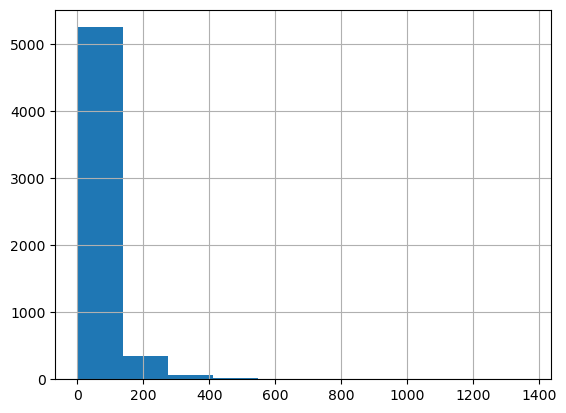

In [93]:
y_train.hist();

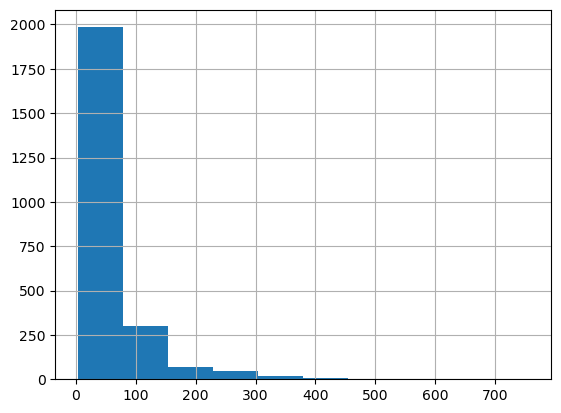

In [94]:
y_test.hist();

In [95]:
scaler =  StandardScaler()
scaler_target = StandardScaler()

In [96]:
cols = list(X_train.columns)
cols

['name_x_Bitter Lake Reservoir Open Space',
 'name_x_Cascade Playground',
 'name_x_Green Lake Park',
 'name_x_Maple Leaf Resevoir Park',
 'name_x_Meridian Playground',
 'name_x_Miller Playfield',
 'name_x_Northlake Park',
 'name_x_Riverview Playfield',
 'name_x_Rogers Playground',
 'name_x_Terry Pettus Park',
 'name_x_Tilikum Place',
 'name_x_Victory Creek Park',
 'name_x_Volunteer Park',
 'name_x_Waterfront Park',
 'name_x_Woodland Park']

In [97]:
X_train

,name_x_Bitter Lake Reservoir Open Space,name_x_Cascade Playground,name_x_Green Lake Park,name_x_Maple Leaf Resevoir Park,name_x_Meridian Playground,name_x_Miller Playfield,name_x_Northlake Park,name_x_Riverview Playfield,name_x_Rogers Playground,name_x_Terry Pettus Park,name_x_Tilikum Place,name_x_Victory Creek Park,name_x_Volunteer Park,name_x_Waterfront Park,name_x_Woodland Park
3593,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1073,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3315,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
144,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5464,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5390,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
860,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7603,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [98]:
X_train[cols] = scaler.fit_transform(X_train)
X_test[cols] = scaler.transform(X_test) 

In [99]:
y_train = scaler_target.fit_transform(y_train.values.reshape(-1, 1)) 
y_test = scaler_target.transform(y_test.values.reshape(-1, 1))

In [100]:
y_train

array([[-0.36000527],
       [-0.66488891],
       [ 0.40220383],
       ...,
       [-0.43622618],
       [ 1.92662201],
       [-0.40573781]])

In [101]:
X_train.describe()

,name_x_Bitter Lake Reservoir Open Space,name_x_Cascade Playground,name_x_Green Lake Park,name_x_Maple Leaf Resevoir Park,name_x_Meridian Playground,name_x_Miller Playfield,name_x_Northlake Park,name_x_Riverview Playfield,name_x_Rogers Playground,name_x_Terry Pettus Park,name_x_Tilikum Place,name_x_Victory Creek Park,name_x_Volunteer Park,name_x_Waterfront Park,name_x_Woodland Park
count,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03,5.681000e+03
mean,7.504412e-18,-4.752794e-17,-6.253677e-18,5.128015e-17,-7.129191e-17,-2.157518e-17,6.066066e-17,-3.189375e-17,3.752206e-17,4.752794e-17,-2.282592e-17,-2.689081e-17,1.563419e-17,2.126250e-17,-3.502059e-17
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-2.954196e-01,-2.943617e-01,-2.729879e-01,-2.915279e-01,-2.799962e-01,-1.766965e-01,-1.456419e-01,-5.637843e-02,-3.086067e-01,-2.915279e-01,-9.035079e-02,-2.879589e-01,-2.839971e-01,-4.353035e-01,-2.978780e-01
25%,-2.954196e-01,-2.943617e-01,-2.729879e-01,-2.915279e-01,-2.799962e-01,-1.766965e-01,-1.456419e-01,-5.637843e-02,-3.086067e-01,-2.915279e-01,-9.035079e-02,-2.879589e-01,-2.839971e-01,-4.353035e-01,-2.978780e-01
50%,-2.954196e-01,-2.943617e-01,-2.729879e-01,-2.915279e-01,-2.799962e-01,-1.766965e-01,-1.456419e-01,-5.637843e-02,-3.086067e-01,-2.915279e-01,-9.035079e-02,-2.879589e-01,-2.839971e-01,-4.353035e-01,-2.978780e-01
75%,-2.954196e-01,-2.943617e-01,-2.729879e-01,-2.915279e-01,-2.799962e-01,-1.766965e-01,-1.456419e-01,-5.637843e-02,-3.086067e-01,-2.915279e-01,-9.035079e-02,-2.879589e-01,-2.839971e-01,-4.353035e-01,-2.978780e-01
max,3.385016e+00,3.397181e+00,3.663166e+00,3.430203e+00,3.571477e+00,5.659423e+00,6.866154e+00,1.773728e+01,3.240370e+00,3.430203e+00,1.106797e+01,3.472718e+00,3.521162e+00,2.297248e+00,3.357079e+00


In [102]:
print(y_train.std(), y_train.mean())
print(y_test.std(), y_test.mean())

1.0 -3.8772794945543226e-17
0.9922924975405533 0.01651851464193824


In [103]:
X_train.columns

Index(['name_x_Bitter Lake Reservoir Open Space', 'name_x_Cascade Playground',
       'name_x_Green Lake Park', 'name_x_Maple Leaf Resevoir Park',
       'name_x_Meridian Playground', 'name_x_Miller Playfield',
       'name_x_Northlake Park', 'name_x_Riverview Playfield',
       'name_x_Rogers Playground', 'name_x_Terry Pettus Park',
       'name_x_Tilikum Place', 'name_x_Victory Creek Park',
       'name_x_Volunteer Park', 'name_x_Waterfront Park',
       'name_x_Woodland Park'],
      dtype='object')

In [104]:
cols = ['name_x_Bitter Lake Reservoir Open Space', 
                    'name_x_Cascade Playground',
                    'name_x_Green Lake Park', 
                    'name_x_Maple Leaf Resevoir Park',
                    'name_x_Meridian Playground', 
                    'name_x_Miller Playfield',
                    'name_x_Northlake Park', 
                    'name_x_Riverview Playfield',
                    'name_x_Rogers Playground', 
                    'name_x_Terry Pettus Park',
                    'name_x_Tilikum Place', 
                    'name_x_Victory Creek Park',
                    'name_x_Volunteer Park', 
                    'name_x_Waterfront Park',
                    'name_x_Woodland Park']

In [105]:
# call the method
regressor = LinearRegression(fit_intercept = False) 
# fit_intercept = false, do not try and fit. If scaled the mean of every feature already is 0. 
# This kind of model will always go through 0

# Fit the model <- THIS IS ML
regressor.fit(X_train[cols], y_train) # Both the training data's

# Carry out predictions on our test set
y_pred = regressor.predict(X_test[cols])

In [106]:
y_pred

array([[-0.40877914],
       [ 1.79699707],
       [ 0.95551682],
       ...,
       [-0.40877914],
       [-0.17088699],
       [-0.02244949]])

In [107]:
# first we need to reverse the transformation so we have meanginful results
# calling inverse_transform on our scaler
y_true = scaler_target.inverse_transform(y_test) # <- observed y values
y_pred_inverse = scaler_target.inverse_transform(y_pred) # <- predicted y

In [108]:
# Calculating the errors
mae = mean_absolute_error(y_true, y_pred_inverse)
mse = mean_squared_error(y_true, y_pred_inverse)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred_inverse)

In [109]:
print('MAE = ', mae.round(2))
print('MSE = ', mse.round(2))
print('RMSE = ', rmse.round(2))
print('R^2 = ', r2.round(2))

MAE =  30.47
MSE =  2544.21
RMSE =  50.44
R^2 =  0.4
